In [1]:
import sys
sys.path.append("../")
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Linearity import Neuron
from IPython.display import set_matplotlib_formats
import scipy.stats as ss
set_matplotlib_formats('pdf', 'png')
plt.style.use('seaborn-notebook')
# load libraries and set plot parameters
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

In [2]:
neuronList = []
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", fileList[i])
            neuronList.append(Neuron.load(fileList[i]))
        except:
            print ("Couldn't read", fileList[i])
print ("Read {} files.".format(len(fileList)))

Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150828/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150902/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c1/plots/c1.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/150904/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160126/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160209/c4/plots/c4.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160219/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c2/plots/c2.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160223/c3/plots/c3.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160513/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160617/c5/plots/c5.pkl
Reading  /media/sahil/NCBS_Shares_BGStim/patch_data/160817/c2/plots/c2.pkl
Reading  /media/sahil/NCB

## J distribution of EPSP one squares

In [3]:
def figureJ(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    epsp_1sq = []
    squares = 1
    feature = 0
    numBins = 200
    for neuron in neuronList:
        try:
            trials = neuron.experiment["Control"][squares].trial
            for trialNum in trials:
                trial = neuron.experiment["Control"][squares].trial[trialNum]
                epsp_1sq.append(trial.feature[feature])
        except:
            print("{}, {}: Out of control?!".format(neuron.index, neuron.date))
    #print (np.mean(epsp_1sq), np.median(epsp_1sq), ss.mode(epsp_1sq))
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(epsp_1sq, bins=numBins)
    maxBin = np.argmax(n)
    modeEPSP = bins[maxBin]
    ymin, ymax = ax.get_ylim()
    ax.vlines(modeEPSP,ymin,ymax, linestyles='--')
    ax.annotate("{:.2f} mV".format(modeEPSP), xy=(modeEPSP, ymax), xytext=(1.2*modeEPSP, ymax), textcoords='data')
    ax.set_xlabel("EPSP Amplitude (mV)")
    ax.set_ylabel("Number of measured responses")
    plt.show()

5_c4_160122, RS_TBS_short: Out of control?!


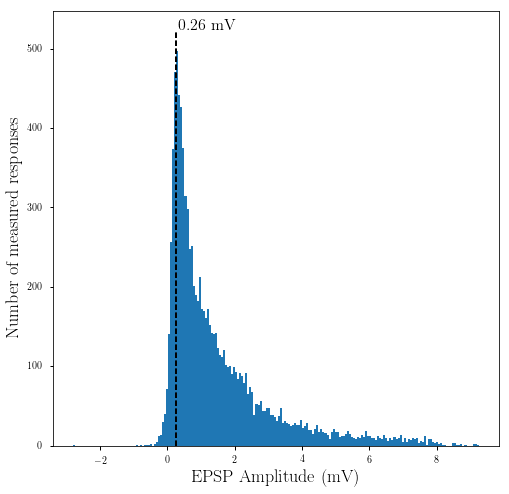

In [4]:
figureJ()

## K Fraction of APs and sublinear responses

In [7]:
def figureK(feature = 0):
    ''' Get's the fraction of times an AP occurs verus PSPs '''
    numNeurons = 0
    numAP = 0
    numPSP = 0
    for neuron in neuronList:
        for experiment in neuron.experiment:
            if experiment == "Control":    
                numNeurons+=1
                for squares in neuron.experiment[experiment]:
                    nSq = neuron.experiment[experiment][squares].trial
                    for trialnum in nSq:
                        if nSq[trialnum].AP_flag:
                            numAP+=1
                        else:
                            numPSP+=1
    
    fracAPs = float(numAP)/numPSP
    fig, ax = plt.subplots()
    index = np.arange(2)
    width = 0.5
    ax.bar(index, (numPSP, numAP), width)
    ax.set_title("CA1 responses")
    ax.set_ylabel("Frequency")
    ax.set_xticks(index)
    ax.set_xticklabels(('PSP', 'AP'))
    #ax.set_yticks(list(ax.get_yticks()) + [numAP])
    ax.annotate("{:.2f} \%".format(fracAPs*1e2), xy=(1, numAP*2.0), xytext=(0.95, numAP*2.0), textcoords='data')
    xaxisVal = ax.get_xlim()[0]
    ax.hlines(numAP, xaxisVal, index[1],linestyle="--")
    plt.show()
    print ("Legend text: Number of cells: {}, number of points: {}, fraction of APS: {}".format(numNeurons, numAP+numPSP, fracAPs))

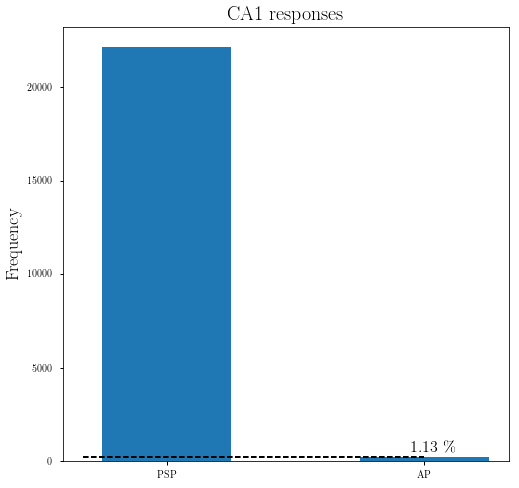

Legend text: Number of cells: 49, number of points: 22371, fraction of APS: 0.0113014782334


In [8]:
figureK()

### TODO: C,D,F,G,H

In [ ]:
neuronList = []
with open("/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_files.txt", 'r') as fp:
    fileList = fp.read().splitlines()
    for i,filename in enumerate(fileList):
        fileList[i] += "plots/" + filename.split('/')[-2] + ".pkl"
        try:
            print ("Reading ", fileList[i])
            neuronList.append(Neuron.load(fileList[i]))
        except:
            print ("Couldn't read", fileList[i])
print ("Read {} files.".format(len(fileList)))